# algorith explanation


## Apriori Algorithm

#### Measure 1: Support.
This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. In Table 1 below, the support of {apple} is 4 out of 8, or 50%. Itemsets can also contain multiple items. For instance, the support of {apple, beer, rice} is 2 out of 8, or 25%.

![](https://annalyzin.files.wordpress.com/2016/04/association-rule-support-table.png?w=503&h=447)

If you discover that sales of items beyond a certain proportion tend to have a significant impact on your profits, you might consider using that proportion as your support threshold. You may then identify itemsets with support values above this threshold as significant itemsets.

#### Measure 2: Confidence. 
This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In Table 1, the confidence of {apple -> beer} is 3 out of 4, or 75%.

![](https://annalyzin.files.wordpress.com/2016/03/association-rule-confidence-eqn.png?w=527&h=77)

One drawback of the confidence measure is that it might misrepresent the importance of an association. This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure. To account for the base popularity of both constituent items, we use a third measure called lift.

#### Measure 3: Lift. 
This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.
![](https://annalyzin.files.wordpress.com/2016/03/association-rule-lift-eqn.png?w=566&h=80)

# Market Basket Analysis of Store Data

## Dataset Description

* Different products given 7500 transactions over the course of a week at a French retail store.
* We have library(**apyori**) to calculate the association rule using Apriori.

## Import the Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
from utils import *

## Read data and Display

In [2]:
store_data = pd.read_csv("./store_data.csv", header=None)
display(store_data.head())
print(store_data.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(7501, 20)


## Preprocessing on Data
*  Here we need a data in form of list for Apriori Algorithm.

In [3]:
store_data = lower_all(store_data)

In [4]:
new_l = no_more_nans(store_data)
new_l

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh


# Modeling

## Apriori Algorithm

* Now time to apply algorithm on data.
* We have provide `min_support`, `min_confidence`, `min_lift`, and `max length` of sample-set for find rule.

In [6]:
apriori_models = {}
params = [
    (2, "ass_2"),
    (3, "ass_3"),
    (4, "ass_4")
]


for i, name in params:
    apriori_model = apriori(new_l, min_support=0.0045, min_confidence=0.2, min_lift=3, max_length=i)
    apriori_models[name] = list(apriori_model)

In [7]:
apriori_models

{'ass_2': [RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
  RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
  RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
  RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'gro

In [8]:
ass_2_result = apriori_models["ass_2"]
ass_3_result = apriori_models["ass_3"][len(ass_2_result):]
ass_4_result = apriori_models["ass_4"][len(ass_3_result)+len(ass_2_result):]

In [17]:
print(f" len of the list: {len(ass_2_result)}")
ass_2_result

 len of the list: 7


[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), 

In [16]:
print(f" len of the list: {len(ass_3_result)}")

ass_3_result


 len of the list: 16


[RelationRecord(items=frozenset({'frozen vegetables', 'shrimp', 'chocolate'}), support=0.005332622317024397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'frozen vegetables', 'chocolate'}), items_add=frozenset({'shrimp'}), confidence=0.23255813953488375, lift=3.2545123221103784), OrderedStatistic(items_base=frozenset({'shrimp', 'chocolate'}), items_add=frozenset({'frozen vegetables'}), confidence=0.29629629629629634, lift=3.1084175084175087)]),
 RelationRecord(items=frozenset({'spaghetti', 'ground beef', 'cooking oil'}), support=0.004799360085321957, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef', 'cooking oil'}), items_add=frozenset({'spaghetti'}), confidence=0.5714285714285714, lift=3.2819951870487856), OrderedStatistic(items_base=frozenset({'spaghetti', 'cooking oil'}), items_add=frozenset({'ground beef'}), confidence=0.3025210084033613, lift=3.0789824749438446)]),
 RelationRecord(items=frozenset({'spaghetti', 'frozen vegetables', 'ground beef

In [15]:
print(f" len of the list: {len(ass_4_result)}")

ass_4_result

 len of the list: 1


[RelationRecord(items=frozenset({'frozen vegetables', 'mineral water', 'milk', 'spaghetti'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mineral water', 'milk', 'spaghetti'}), items_add=frozenset({'frozen vegetables'}), confidence=0.28813559322033894, lift=3.0228043143297376)])]

In [7]:
print("There are {} Relation derived.".format(len(ass_4_result)+len(ass_3_result)+len(ass_2_result)+len(ass_5_result)))

There are 24 Relation derived.


# Fetching ordered_statistics

In [19]:
ass_2_oredered = get_order_static(ass_2_result)
ass_3_oredered = get_order_static(ass_3_result)
ass_4_oredered = get_order_static(ass_4_result)

In [21]:
ass_3_oredered[0]

(OrderedStatistic(items_base=frozenset({'frozen vegetables', 'chocolate'}), items_add=frozenset({'shrimp'}), confidence=0.23255813953488375, lift=3.2545123221103784),
 0.005332622317024397)

# converting to DataFrame

In [23]:
df2 = conv_to_df(ass_2_oredered)
df3 = conv_to_df(ass_3_oredered)
df4 = conv_to_df(ass_4_oredered)

In [24]:
#sorting by lift and support descending order
df3 = sort_by(df3)
df3

,items,support,confidence,lift
0,"herb & pepper , spaghetti -> ground beef",0.006399,0.393443,4.004360
1,"herb & pepper , mineral water -> ground beef",0.006666,0.390625,3.975683
2,"frozen vegetables , spaghetti -> tomatoes",0.006666,0.239234,3.498046
3,"mineral water , soup -> olive oil",0.005199,0.225434,3.423030
4,"milk , ground beef -> olive oil",0.004933,0.224242,3.404944
5,"tomatoes , spaghetti -> frozen vegetables",0.006666,0.318471,3.341054
6,"grated cheese , spaghetti -> ground beef",0.005333,0.322581,3.283144
7,"ground beef , cooking oil -> spaghetti",0.004799,0.571429,3.281995
8,"frozen vegetables , olive oil -> milk",0.004799,0.423529,3.268410
9,"frozen vegetables , chocolate -> shrimp",0.005333,0.232558,3.254512


# Visualization

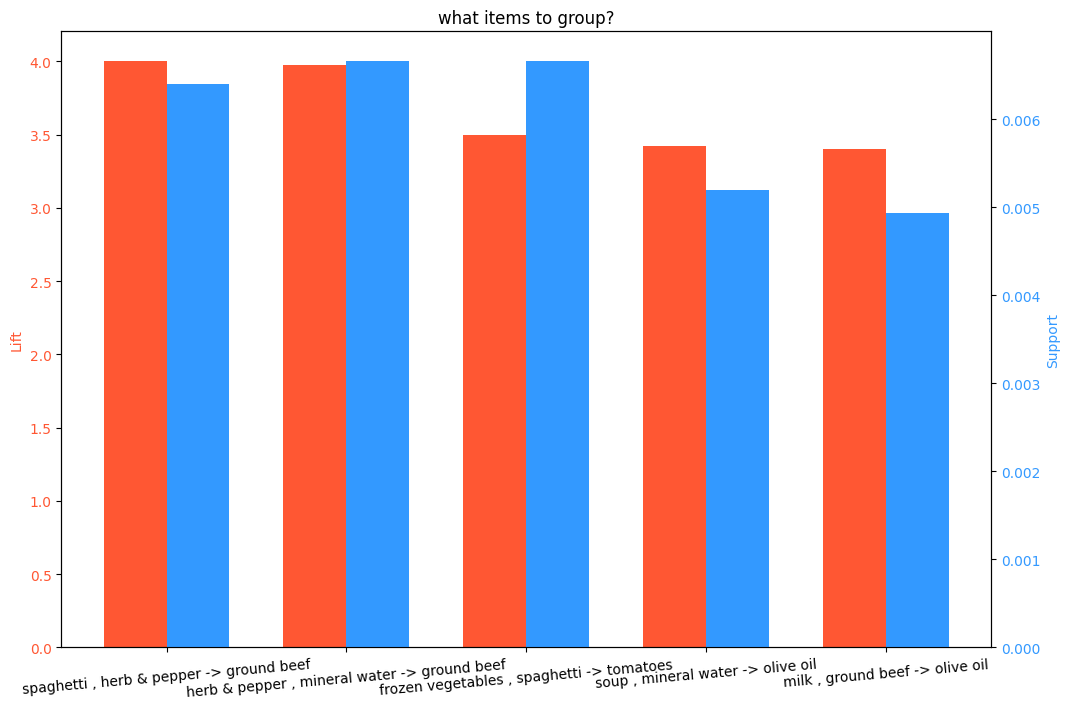

In [18]:
df = df3.copy()
colors = ['#FF5733', '#3399FF']
# Create a figure and axis
plt.figure(figsize=(12, 8))
#get the current Axes instance on the current figure
ax = plt.gca()

# Extract data for plotting
items = df['items'][:5]
lift = df['lift'][:5]
support = df['support'][:5]

# Set the width of the bars
bar_width = 0.35

# Generate an array of x positions for each group
x = np.arange(len(items))

# Create side-by-side bars for Lift and Support
plt.bar(x, lift, bar_width, color=colors[0], label='Lift')
ax.set_ylabel('Lift', color=colors[0])
ax.tick_params(axis='y', labelcolor=colors[0])

# Create a secondary y-axis for Support
ax2 = ax.twinx()
plt.bar(x + bar_width, support, bar_width, color=colors[1], label='Support')
ax2.set_ylabel('Support', color=colors[1])
ax2.tick_params(axis='y', labelcolor=colors[1])

# Add a legend

# Set the title
plt.title("what items to group?")

# Show the plot
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(items, rotation=5)

plt.show()
